In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

## import the data 

In [2]:
df = pd.read_csv('data (2).csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
def precent_values(df):
    precent_nan = (100*df.isna().sum())/len(df)
    precent_nan = precent_nan[precent_nan > 0].sort_values()
    return precent_nan

In [6]:
precent_nan = precent_values(df)

In [7]:
precent_nan

Series([], dtype: float64)

## over view your data

In [8]:
df.corr()['price'].sort_values()

C:\Users\moham\AppData\Local\Temp\ipykernel_14160\321850276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

C:\Users\moham\AppData\Local\Temp\ipykernel_14160\2953937982.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df['price'])


<AxesSubplot: xlabel='price', ylabel='Density'>

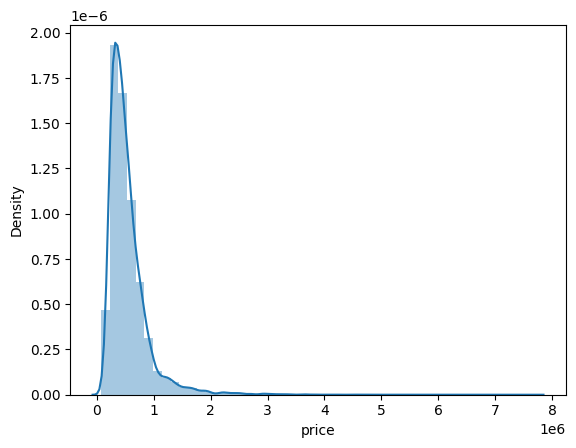

In [9]:
sns.distplot( df['price'])

In [10]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
useless_data= ['zipcode','id','date','long','condition','yr_built','sqft_lot15','sqft_lot','yr_renovated','sqft_lot','yr_renovated']
df = df.drop(useless_data ,axis= 1)

In [12]:
df.corr()['price'].nlargest(12)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
Name: price, dtype: float64

<AxesSubplot: >

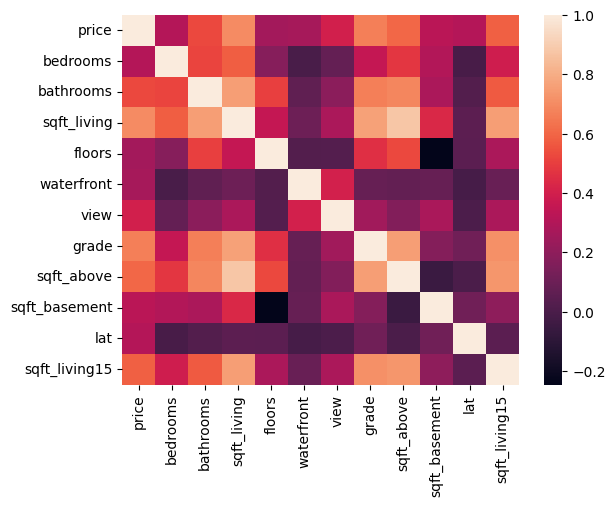

In [13]:
sns.heatmap(data=df.corr())

<AxesSubplot: xlabel='sqft_living', ylabel='price'>

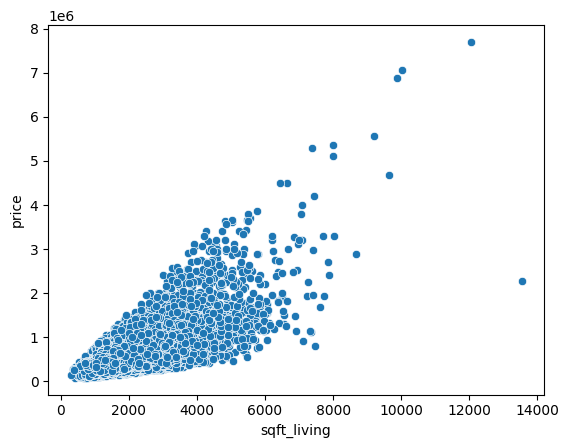

In [14]:
sns.scatterplot(x=df['sqft_living']  ,y = df['price'])

In [15]:
df[df["sqft_living"] > 13000]

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
12777,2280000.0,7,8.0,13540,3.0,0,4,12,9410,4130,47.6675,4850


In [16]:
df.drop(12777, axis=0, inplace=True)

<AxesSubplot: xlabel='grade', ylabel='price'>

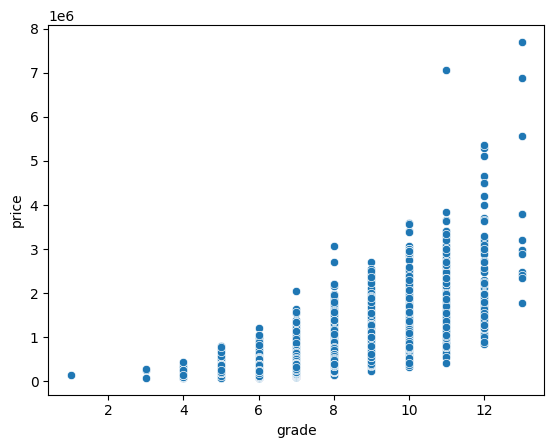

In [17]:
sns.scatterplot(x=df['grade']  ,y = df['price'])

<AxesSubplot: xlabel='lat', ylabel='price'>

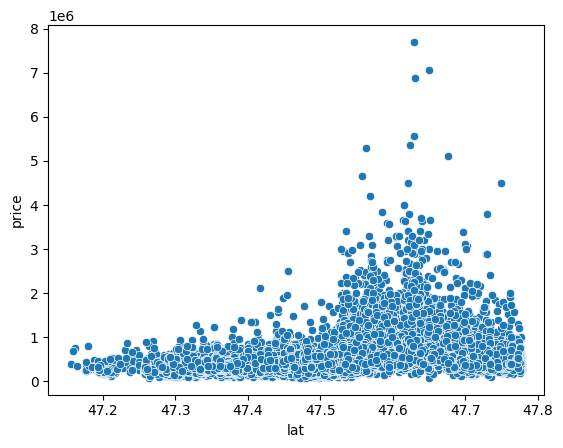

In [18]:
sns.scatterplot(x=df['lat']  ,y = df['price'])

In [19]:
df[(df["price"] > 6000000) ]

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
3914,7062500.0,5,4.50,10040,2.0,1,2,11,7680,2360,47.6500,3930
7252,7700000.0,6,8.00,12050,2.5,0,3,13,8570,3480,47.6298,3940
9254,6885000.0,6,7.75,9890,2.0,0,4,13,8860,1030,47.6305,4540


In [20]:
df.drop([3914,7252,9254], axis=0, inplace=True)

<AxesSubplot: xlabel='grade', ylabel='price'>

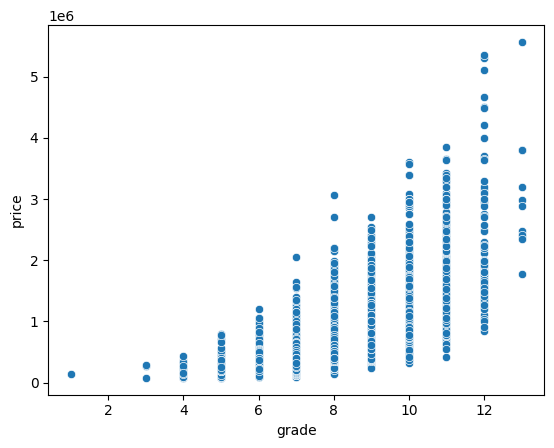

In [21]:
sns.scatterplot(x=df['grade']  ,y = df['price'])

In [22]:
df[(df['price'] > 5000000) & (df['grade'] > 12)]



,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
4411,5570000.0,5,5.75,9200,2.0,0,0,13,6200,3000,47.6289,3560


In [23]:
df.drop(4411,axis=0,inplace=True)

<AxesSubplot: xlabel='sqft_above', ylabel='price'>

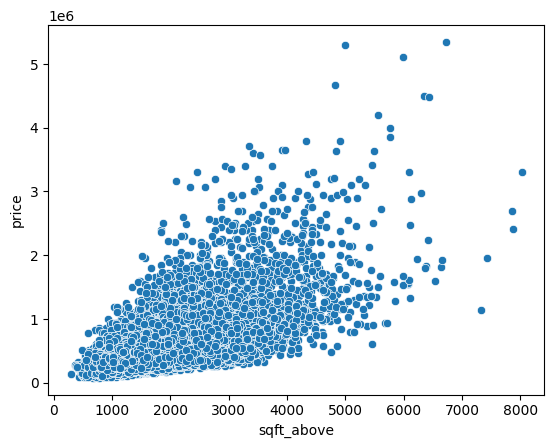

In [24]:
sns.scatterplot(x=df['sqft_above']  ,y = df['price'])

In [25]:
df[df['sqft_above'] > 7000].index

Int64Index([11871, 13411, 18302, 18594, 19858], dtype='int64')

In [26]:
df.drop([11871, 13411, 18302, 18594, 19858],axis=0,inplace=True)

## make a linear regression model (split data and make model with sklearn)

In [27]:
X = df.drop("price" ,axis=1)
y =df['price']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
model = LinearRegression()

In [32]:
model.fit(X_train, y_train)

LinearRegression()

In [33]:
prediction_model = model.predict(X_test)

In [34]:
MAE= mean_absolute_error(y_test,prediction_model)
RMSE= np.sqrt(mean_squared_error(y_test,prediction_model))

In [35]:
MAE

132114.57689673713

In [36]:
RMSE

204382.5152519558

## make a polynomial regression model (split data and make model with sklearn )

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [38]:
model_2=LinearRegression()

In [39]:
model_2.fit(scaled_X_train, y_train)

LinearRegression()

In [40]:
prediction_model_2=model_2.predict(scaled_X_test)

In [41]:
MAE2= mean_absolute_error(y_test,prediction_model_2)
RMSE2= np.sqrt(mean_squared_error(y_test,prediction_model_2))

In [42]:
MAE2

132196.98384173954

In [43]:
RMSE2

204451.24833069358

## compare between two models with plots and accuracy 

In [44]:
Error_Values_RMSE = {'Linear Regression' : RMSE, 'Polynomial Regression' : RMSE2 }
'Best Model is ===> ',min(Error_Values_RMSE, key=Error_Values_RMSE.get)

('Best Model is ===> ', 'Linear Regression')

## Conclusion 

In [46]:
filename="House_price_prediction"
pickle.dump(model, open(filename, "wb"))

In [47]:
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(X_test)

array([ 736589.48472976,  632248.65143815,  430864.24565502, ...,
        611641.9688722 , 1211618.19088633,  684248.17245913])